In [1]:
import pandas as pd
import numpy as np
import re as re
import difflib

In [2]:
data = pd.read_csv("C:\\Users\\teodo\\OneDrive\\Desktop\\data_new.csv")
data

,locatie,detalii,pret
0,"Bucuresti, IF, Prelungirea Ghencea",3 camere • 84 m² • etajul 4/5 • 2009 • ...,79.000 eur
1,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 2/4 • 1974 • ...,87.900 eur
2,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 4/4 • 1976 • ...,74.500 eur
3,"Iasi, IS, Cug",3 camere • 55 m² • etajul 3 • 2019 • s...,81.500 eur
4,"Bucuresti, IF, Tineretului",1 cameră • 34 m² • etajul 9/10 • 1981 •...,65.500 eur
...,...,...,...
13895,"Bucuresti, IF, Brancoveanu",4 camere • 90 m² • etajul 4/4 • 1979 • ...,115.000 eur
13896,"Tulcea, TL, E3",3 camere • 63 m² • etajul 3 • 1991 • d...,82.000 eur
13897,"Deva, HD, Zamfirescu",2 camere • 60 m² • etajul 4 • 1983 • d...,54.000 eur
13898,"Brasov, BV, Astra",2 camere • 50 m² • etajul 4 • 1980 • d...,63.000 eur


In [3]:
data[['nr. camere','suprafata','etaje','an finalizare constructie','compartimentare']]=data['detalii'].str.split('•',expand=True)
data

,locatie,detalii,pret,nr. camere,suprafata,etaje,an finalizare constructie,compartimentare
0,"Bucuresti, IF, Prelungirea Ghencea",3 camere • 84 m² • etajul 4/5 • 2009 • ...,79.000 eur,3 camere,84 m²,etajul 4/5,2009,decomandat
1,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 2/4 • 1974 • ...,87.900 eur,3 camere,64 m²,etajul 2/4,1974,semidecomandat
2,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 4/4 • 1976 • ...,74.500 eur,3 camere,64 m²,etajul 4/4,1976,semidecomandat
3,"Iasi, IS, Cug",3 camere • 55 m² • etajul 3 • 2019 • s...,81.500 eur,3 camere,55 m²,etajul 3,2019,semidecomandat
4,"Bucuresti, IF, Tineretului",1 cameră • 34 m² • etajul 9/10 • 1981 •...,65.500 eur,1 cameră,34 m²,etajul 9/10,1981,decomandat
...,...,...,...,...,...,...,...,...
13895,"Bucuresti, IF, Brancoveanu",4 camere • 90 m² • etajul 4/4 • 1979 • ...,115.000 eur,4 camere,90 m²,etajul 4/4,1979,decomandat
13896,"Tulcea, TL, E3",3 camere • 63 m² • etajul 3 • 1991 • d...,82.000 eur,3 camere,63 m²,etajul 3,1991,decomandat
13897,"Deva, HD, Zamfirescu",2 camere • 60 m² • etajul 4 • 1983 • d...,54.000 eur,2 camere,60 m²,etajul 4,1983,decomandat
13898,"Brasov, BV, Astra",2 camere • 50 m² • etajul 4 • 1980 • d...,63.000 eur,2 camere,50 m²,etajul 4,1980,decomandat


In [4]:
data[['Numar_camere','text','blank']]=data['nr. camere'].str.split(' ',expand=True)
data

,locatie,detalii,pret,nr. camere,suprafata,etaje,an finalizare constructie,compartimentare,Numar_camere,text,blank
0,"Bucuresti, IF, Prelungirea Ghencea",3 camere • 84 m² • etajul 4/5 • 2009 • ...,79.000 eur,3 camere,84 m²,etajul 4/5,2009,decomandat,3,camere,
1,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 2/4 • 1974 • ...,87.900 eur,3 camere,64 m²,etajul 2/4,1974,semidecomandat,3,camere,
2,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 4/4 • 1976 • ...,74.500 eur,3 camere,64 m²,etajul 4/4,1976,semidecomandat,3,camere,
3,"Iasi, IS, Cug",3 camere • 55 m² • etajul 3 • 2019 • s...,81.500 eur,3 camere,55 m²,etajul 3,2019,semidecomandat,3,camere,
4,"Bucuresti, IF, Tineretului",1 cameră • 34 m² • etajul 9/10 • 1981 •...,65.500 eur,1 cameră,34 m²,etajul 9/10,1981,decomandat,1,cameră,
...,...,...,...,...,...,...,...,...,...,...,...
13895,"Bucuresti, IF, Brancoveanu",4 camere • 90 m² • etajul 4/4 • 1979 • ...,115.000 eur,4 camere,90 m²,etajul 4/4,1979,decomandat,4,camere,
13896,"Tulcea, TL, E3",3 camere • 63 m² • etajul 3 • 1991 • d...,82.000 eur,3 camere,63 m²,etajul 3,1991,decomandat,3,camere,
13897,"Deva, HD, Zamfirescu",2 camere • 60 m² • etajul 4 • 1983 • d...,54.000 eur,2 camere,60 m²,etajul 4,1983,decomandat,2,camere,
13898,"Brasov, BV, Astra",2 camere • 50 m² • etajul 4 • 1980 • d...,63.000 eur,2 camere,50 m²,etajul 4,1980,decomandat,2,camere,


In [5]:
data[['blank1','Suprafata','unit','blank2']]=data['suprafata'].str.split(' ',expand=True)
data

,locatie,detalii,pret,nr. camere,suprafata,etaje,an finalizare constructie,compartimentare,Numar_camere,text,blank,blank1,Suprafata,unit,blank2
0,"Bucuresti, IF, Prelungirea Ghencea",3 camere • 84 m² • etajul 4/5 • 2009 • ...,79.000 eur,3 camere,84 m²,etajul 4/5,2009,decomandat,3,camere,,,84,m²,
1,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 2/4 • 1974 • ...,87.900 eur,3 camere,64 m²,etajul 2/4,1974,semidecomandat,3,camere,,,64,m²,
2,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 4/4 • 1976 • ...,74.500 eur,3 camere,64 m²,etajul 4/4,1976,semidecomandat,3,camere,,,64,m²,
3,"Iasi, IS, Cug",3 camere • 55 m² • etajul 3 • 2019 • s...,81.500 eur,3 camere,55 m²,etajul 3,2019,semidecomandat,3,camere,,,55,m²,
4,"Bucuresti, IF, Tineretului",1 cameră • 34 m² • etajul 9/10 • 1981 •...,65.500 eur,1 cameră,34 m²,etajul 9/10,1981,decomandat,1,cameră,,,34,m²,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,"Bucuresti, IF, Brancoveanu",4 camere • 90 m² • etajul 4/4 • 1979 • ...,115.000 eur,4 camere,90 m²,etajul 4/4,1979,decomandat,4,camere,,,90,m²,
13896,"Tulcea, TL, E3",3 camere • 63 m² • etajul 3 • 1991 • d...,82.000 eur,3 camere,63 m²,etajul 3,1991,decomandat,3,camere,,,63,m²,
13897,"Deva, HD, Zamfirescu",2 camere • 60 m² • etajul 4 • 1983 • d...,54.000 eur,2 camere,60 m²,etajul 4,1983,decomandat,2,camere,,,60,m²,
13898,"Brasov, BV, Astra",2 camere • 50 m² • etajul 4 • 1980 • d...,63.000 eur,2 camere,50 m²,etajul 4,1980,decomandat,2,camere,,,50,m²,


In [6]:
data[['etaj','total etaje']]=data['etaje'].str.split('/',expand=True)
data

,locatie,detalii,pret,nr. camere,suprafata,etaje,an finalizare constructie,compartimentare,Numar_camere,text,blank,blank1,Suprafata,unit,blank2,etaj,total etaje
0,"Bucuresti, IF, Prelungirea Ghencea",3 camere • 84 m² • etajul 4/5 • 2009 • ...,79.000 eur,3 camere,84 m²,etajul 4/5,2009,decomandat,3,camere,,,84,m²,,etajul 4,5
1,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 2/4 • 1974 • ...,87.900 eur,3 camere,64 m²,etajul 2/4,1974,semidecomandat,3,camere,,,64,m²,,etajul 2,4
2,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 4/4 • 1976 • ...,74.500 eur,3 camere,64 m²,etajul 4/4,1976,semidecomandat,3,camere,,,64,m²,,etajul 4,4
3,"Iasi, IS, Cug",3 camere • 55 m² • etajul 3 • 2019 • s...,81.500 eur,3 camere,55 m²,etajul 3,2019,semidecomandat,3,camere,,,55,m²,,etajul 3,None
4,"Bucuresti, IF, Tineretului",1 cameră • 34 m² • etajul 9/10 • 1981 •...,65.500 eur,1 cameră,34 m²,etajul 9/10,1981,decomandat,1,cameră,,,34,m²,,etajul 9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,"Bucuresti, IF, Brancoveanu",4 camere • 90 m² • etajul 4/4 • 1979 • ...,115.000 eur,4 camere,90 m²,etajul 4/4,1979,decomandat,4,camere,,,90,m²,,etajul 4,4
13896,"Tulcea, TL, E3",3 camere • 63 m² • etajul 3 • 1991 • d...,82.000 eur,3 camere,63 m²,etajul 3,1991,decomandat,3,camere,,,63,m²,,etajul 3,None
13897,"Deva, HD, Zamfirescu",2 camere • 60 m² • etajul 4 • 1983 • d...,54.000 eur,2 camere,60 m²,etajul 4,1983,decomandat,2,camere,,,60,m²,,etajul 4,None
13898,"Brasov, BV, Astra",2 camere • 50 m² • etajul 4 • 1980 • d...,63.000 eur,2 camere,50 m²,etajul 4,1980,decomandat,2,camere,,,50,m²,,etajul 4,None


In [7]:
data[['blank3','text','Etaj','blanks']]=data['etaj'].str.split(' ',expand=True)
data

,locatie,detalii,pret,nr. camere,suprafata,etaje,an finalizare constructie,compartimentare,Numar_camere,text,blank,blank1,Suprafata,unit,blank2,etaj,total etaje,blank3,Etaj,blanks
0,"Bucuresti, IF, Prelungirea Ghencea",3 camere • 84 m² • etajul 4/5 • 2009 • ...,79.000 eur,3 camere,84 m²,etajul 4/5,2009,decomandat,3,etajul,,,84,m²,,etajul 4,5,,4,None
1,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 2/4 • 1974 • ...,87.900 eur,3 camere,64 m²,etajul 2/4,1974,semidecomandat,3,etajul,,,64,m²,,etajul 2,4,,2,None
2,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 4/4 • 1976 • ...,74.500 eur,3 camere,64 m²,etajul 4/4,1976,semidecomandat,3,etajul,,,64,m²,,etajul 4,4,,4,None
3,"Iasi, IS, Cug",3 camere • 55 m² • etajul 3 • 2019 • s...,81.500 eur,3 camere,55 m²,etajul 3,2019,semidecomandat,3,etajul,,,55,m²,,etajul 3,None,,3,
4,"Bucuresti, IF, Tineretului",1 cameră • 34 m² • etajul 9/10 • 1981 •...,65.500 eur,1 cameră,34 m²,etajul 9/10,1981,decomandat,1,etajul,,,34,m²,,etajul 9,10,,9,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,"Bucuresti, IF, Brancoveanu",4 camere • 90 m² • etajul 4/4 • 1979 • ...,115.000 eur,4 camere,90 m²,etajul 4/4,1979,decomandat,4,etajul,,,90,m²,,etajul 4,4,,4,None
13896,"Tulcea, TL, E3",3 camere • 63 m² • etajul 3 • 1991 • d...,82.000 eur,3 camere,63 m²,etajul 3,1991,decomandat,3,etajul,,,63,m²,,etajul 3,None,,3,
13897,"Deva, HD, Zamfirescu",2 camere • 60 m² • etajul 4 • 1983 • d...,54.000 eur,2 camere,60 m²,etajul 4,1983,decomandat,2,etajul,,,60,m²,,etajul 4,None,,4,
13898,"Brasov, BV, Astra",2 camere • 50 m² • etajul 4 • 1980 • d...,63.000 eur,2 camere,50 m²,etajul 4,1980,decomandat,2,etajul,,,50,m²,,etajul 4,None,,4,


In [8]:
data[['blank4','Compartimentare']]=data['compartimentare'].str.split(' ',expand=True)
data

,locatie,detalii,pret,nr. camere,suprafata,etaje,an finalizare constructie,compartimentare,Numar_camere,text,...,Suprafata,unit,blank2,etaj,total etaje,blank3,Etaj,blanks,blank4,Compartimentare
0,"Bucuresti, IF, Prelungirea Ghencea",3 camere • 84 m² • etajul 4/5 • 2009 • ...,79.000 eur,3 camere,84 m²,etajul 4/5,2009,decomandat,3,etajul,...,84,m²,,etajul 4,5,,4,None,,decomandat
1,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 2/4 • 1974 • ...,87.900 eur,3 camere,64 m²,etajul 2/4,1974,semidecomandat,3,etajul,...,64,m²,,etajul 2,4,,2,None,,semidecomandat
2,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 4/4 • 1976 • ...,74.500 eur,3 camere,64 m²,etajul 4/4,1976,semidecomandat,3,etajul,...,64,m²,,etajul 4,4,,4,None,,semidecomandat
3,"Iasi, IS, Cug",3 camere • 55 m² • etajul 3 • 2019 • s...,81.500 eur,3 camere,55 m²,etajul 3,2019,semidecomandat,3,etajul,...,55,m²,,etajul 3,None,,3,,,semidecomandat
4,"Bucuresti, IF, Tineretului",1 cameră • 34 m² • etajul 9/10 • 1981 •...,65.500 eur,1 cameră,34 m²,etajul 9/10,1981,decomandat,1,etajul,...,34,m²,,etajul 9,10,,9,None,,decomandat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,"Bucuresti, IF, Brancoveanu",4 camere • 90 m² • etajul 4/4 • 1979 • ...,115.000 eur,4 camere,90 m²,etajul 4/4,1979,decomandat,4,etajul,...,90,m²,,etajul 4,4,,4,None,,decomandat
13896,"Tulcea, TL, E3",3 camere • 63 m² • etajul 3 • 1991 • d...,82.000 eur,3 camere,63 m²,etajul 3,1991,decomandat,3,etajul,...,63,m²,,etajul 3,None,,3,,,decomandat
13897,"Deva, HD, Zamfirescu",2 camere • 60 m² • etajul 4 • 1983 • d...,54.000 eur,2 camere,60 m²,etajul 4,1983,decomandat,2,etajul,...,60,m²,,etajul 4,None,,4,,,decomandat
13898,"Brasov, BV, Astra",2 camere • 50 m² • etajul 4 • 1980 • d...,63.000 eur,2 camere,50 m²,etajul 4,1980,decomandat,2,etajul,...,50,m²,,etajul 4,None,,4,,,decomandat


In [9]:
data[['blank5','An_finalizare_constructie','blank6']]=data['an finalizare constructie'].str.split(' ',expand=True)
data

,locatie,detalii,pret,nr. camere,suprafata,etaje,an finalizare constructie,compartimentare,Numar_camere,text,...,etaj,total etaje,blank3,Etaj,blanks,blank4,Compartimentare,blank5,An_finalizare_constructie,blank6
0,"Bucuresti, IF, Prelungirea Ghencea",3 camere • 84 m² • etajul 4/5 • 2009 • ...,79.000 eur,3 camere,84 m²,etajul 4/5,2009,decomandat,3,etajul,...,etajul 4,5,,4,None,,decomandat,,2009,
1,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 2/4 • 1974 • ...,87.900 eur,3 camere,64 m²,etajul 2/4,1974,semidecomandat,3,etajul,...,etajul 2,4,,2,None,,semidecomandat,,1974,
2,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 4/4 • 1976 • ...,74.500 eur,3 camere,64 m²,etajul 4/4,1976,semidecomandat,3,etajul,...,etajul 4,4,,4,None,,semidecomandat,,1976,
3,"Iasi, IS, Cug",3 camere • 55 m² • etajul 3 • 2019 • s...,81.500 eur,3 camere,55 m²,etajul 3,2019,semidecomandat,3,etajul,...,etajul 3,None,,3,,,semidecomandat,,2019,
4,"Bucuresti, IF, Tineretului",1 cameră • 34 m² • etajul 9/10 • 1981 •...,65.500 eur,1 cameră,34 m²,etajul 9/10,1981,decomandat,1,etajul,...,etajul 9,10,,9,None,,decomandat,,1981,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,"Bucuresti, IF, Brancoveanu",4 camere • 90 m² • etajul 4/4 • 1979 • ...,115.000 eur,4 camere,90 m²,etajul 4/4,1979,decomandat,4,etajul,...,etajul 4,4,,4,None,,decomandat,,1979,
13896,"Tulcea, TL, E3",3 camere • 63 m² • etajul 3 • 1991 • d...,82.000 eur,3 camere,63 m²,etajul 3,1991,decomandat,3,etajul,...,etajul 3,None,,3,,,decomandat,,1991,
13897,"Deva, HD, Zamfirescu",2 camere • 60 m² • etajul 4 • 1983 • d...,54.000 eur,2 camere,60 m²,etajul 4,1983,decomandat,2,etajul,...,etajul 4,None,,4,,,decomandat,,1983,
13898,"Brasov, BV, Astra",2 camere • 50 m² • etajul 4 • 1980 • d...,63.000 eur,2 camere,50 m²,etajul 4,1980,decomandat,2,etajul,...,etajul 4,None,,4,,,decomandat,,1980,


In [10]:
data[['Localitate','Judet','Zona']]=data['locatie'].str.split(',',expand=True)
data

,locatie,detalii,pret,nr. camere,suprafata,etaje,an finalizare constructie,compartimentare,Numar_camere,text,...,Etaj,blanks,blank4,Compartimentare,blank5,An_finalizare_constructie,blank6,Localitate,Judet,Zona
0,"Bucuresti, IF, Prelungirea Ghencea",3 camere • 84 m² • etajul 4/5 • 2009 • ...,79.000 eur,3 camere,84 m²,etajul 4/5,2009,decomandat,3,etajul,...,4,None,,decomandat,,2009,,Bucuresti,IF,Prelungirea Ghencea
1,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 2/4 • 1974 • ...,87.900 eur,3 camere,64 m²,etajul 2/4,1974,semidecomandat,3,etajul,...,2,None,,semidecomandat,,1974,,Bucuresti,IF,Berceni
2,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 4/4 • 1976 • ...,74.500 eur,3 camere,64 m²,etajul 4/4,1976,semidecomandat,3,etajul,...,4,None,,semidecomandat,,1976,,Bucuresti,IF,Berceni
3,"Iasi, IS, Cug",3 camere • 55 m² • etajul 3 • 2019 • s...,81.500 eur,3 camere,55 m²,etajul 3,2019,semidecomandat,3,etajul,...,3,,,semidecomandat,,2019,,Iasi,IS,Cug
4,"Bucuresti, IF, Tineretului",1 cameră • 34 m² • etajul 9/10 • 1981 •...,65.500 eur,1 cameră,34 m²,etajul 9/10,1981,decomandat,1,etajul,...,9,None,,decomandat,,1981,,Bucuresti,IF,Tineretului
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,"Bucuresti, IF, Brancoveanu",4 camere • 90 m² • etajul 4/4 • 1979 • ...,115.000 eur,4 camere,90 m²,etajul 4/4,1979,decomandat,4,etajul,...,4,None,,decomandat,,1979,,Bucuresti,IF,Brancoveanu
13896,"Tulcea, TL, E3",3 camere • 63 m² • etajul 3 • 1991 • d...,82.000 eur,3 camere,63 m²,etajul 3,1991,decomandat,3,etajul,...,3,,,decomandat,,1991,,Tulcea,TL,E3
13897,"Deva, HD, Zamfirescu",2 camere • 60 m² • etajul 4 • 1983 • d...,54.000 eur,2 camere,60 m²,etajul 4,1983,decomandat,2,etajul,...,4,,,decomandat,,1983,,Deva,HD,Zamfirescu
13898,"Brasov, BV, Astra",2 camere • 50 m² • etajul 4 • 1980 • d...,63.000 eur,2 camere,50 m²,etajul 4,1980,decomandat,2,etajul,...,4,,,decomandat,,1980,,Brasov,BV,Astra


In [11]:
data[['Pret','Moneda']]=data['pret'].str.split(' ',expand=True)
data

,locatie,detalii,pret,nr. camere,suprafata,etaje,an finalizare constructie,compartimentare,Numar_camere,text,...,blank4,Compartimentare,blank5,An_finalizare_constructie,blank6,Localitate,Judet,Zona,Pret,Moneda
0,"Bucuresti, IF, Prelungirea Ghencea",3 camere • 84 m² • etajul 4/5 • 2009 • ...,79.000 eur,3 camere,84 m²,etajul 4/5,2009,decomandat,3,etajul,...,,decomandat,,2009,,Bucuresti,IF,Prelungirea Ghencea,79.000,eur
1,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 2/4 • 1974 • ...,87.900 eur,3 camere,64 m²,etajul 2/4,1974,semidecomandat,3,etajul,...,,semidecomandat,,1974,,Bucuresti,IF,Berceni,87.900,eur
2,"Bucuresti, IF, Berceni",3 camere • 64 m² • etajul 4/4 • 1976 • ...,74.500 eur,3 camere,64 m²,etajul 4/4,1976,semidecomandat,3,etajul,...,,semidecomandat,,1976,,Bucuresti,IF,Berceni,74.500,eur
3,"Iasi, IS, Cug",3 camere • 55 m² • etajul 3 • 2019 • s...,81.500 eur,3 camere,55 m²,etajul 3,2019,semidecomandat,3,etajul,...,,semidecomandat,,2019,,Iasi,IS,Cug,81.500,eur
4,"Bucuresti, IF, Tineretului",1 cameră • 34 m² • etajul 9/10 • 1981 •...,65.500 eur,1 cameră,34 m²,etajul 9/10,1981,decomandat,1,etajul,...,,decomandat,,1981,,Bucuresti,IF,Tineretului,65.500,eur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,"Bucuresti, IF, Brancoveanu",4 camere • 90 m² • etajul 4/4 • 1979 • ...,115.000 eur,4 camere,90 m²,etajul 4/4,1979,decomandat,4,etajul,...,,decomandat,,1979,,Bucuresti,IF,Brancoveanu,115.000,eur
13896,"Tulcea, TL, E3",3 camere • 63 m² • etajul 3 • 1991 • d...,82.000 eur,3 camere,63 m²,etajul 3,1991,decomandat,3,etajul,...,,decomandat,,1991,,Tulcea,TL,E3,82.000,eur
13897,"Deva, HD, Zamfirescu",2 camere • 60 m² • etajul 4 • 1983 • d...,54.000 eur,2 camere,60 m²,etajul 4,1983,decomandat,2,etajul,...,,decomandat,,1983,,Deva,HD,Zamfirescu,54.000,eur
13898,"Brasov, BV, Astra",2 camere • 50 m² • etajul 4 • 1980 • d...,63.000 eur,2 camere,50 m²,etajul 4,1980,decomandat,2,etajul,...,,decomandat,,1980,,Brasov,BV,Astra,63.000,eur


In [12]:
columns = ['pret', 'locatie','detalii','nr. camere','suprafata','etaje','an finalizare constructie','compartimentare','text','blank','blank1','unit','blank2','etaj','total etaje','blank3','blank4','blank5','blank6','Moneda','blanks']
data.drop(columns, inplace=True, axis=1)
data

,Numar_camere,Suprafata,Etaj,Compartimentare,An_finalizare_constructie,Localitate,Judet,Zona,Pret
0,3,84,4,decomandat,2009,Bucuresti,IF,Prelungirea Ghencea,79.000
1,3,64,2,semidecomandat,1974,Bucuresti,IF,Berceni,87.900
2,3,64,4,semidecomandat,1976,Bucuresti,IF,Berceni,74.500
3,3,55,3,semidecomandat,2019,Iasi,IS,Cug,81.500
4,1,34,9,decomandat,1981,Bucuresti,IF,Tineretului,65.500
...,...,...,...,...,...,...,...,...,...
13895,4,90,4,decomandat,1979,Bucuresti,IF,Brancoveanu,115.000
13896,3,63,3,decomandat,1991,Tulcea,TL,E3,82.000
13897,2,60,4,decomandat,1983,Deva,HD,Zamfirescu,54.000
13898,2,50,4,decomandat,1980,Brasov,BV,Astra,63.000


In [13]:
Compartimentare = data[["Compartimentare"]]
Compartimentare = pd.get_dummies(Compartimentare)
Compartimentare

,Compartimentare_ circular,Compartimentare_ decomandat,Compartimentare_ nedecomandat,Compartimentare_ semidecomandat
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
13895,0,1,0,0
13896,0,1,0,0
13897,0,1,0,0
13898,0,1,0,0


In [14]:
Judet = data[["Judet"]]
Judet = pd.get_dummies(Judet)
Judet

,Judet_ AB,Judet_ AG,Judet_ AR,Judet_ BC,Judet_ BH,Judet_ BN,Judet_ BR,Judet_ BT,Judet_ BV,Judet_ BZ,...,Judet_ SB,Judet_ SJ,Judet_ SM,Judet_ SV,Judet_ TL,Judet_ TM,Judet_ TR,Judet_ VL,Judet_ VN,Judet_ VS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13898,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Localitate = data[["Localitate"]]
Localitate = pd.get_dummies(Localitate)
Localitate

,Localitate_1 Decembrie,Localitate_Abrud,Localitate_Aghiresu Fabrici,Localitate_Agigea,Localitate_Alba Iulia,Localitate_Alexandria,Localitate_Apahida,Localitate_Arad,Localitate_Aricestii Rahtivani,Localitate_Azuga,...,Localitate_Valenii De Munte,Localitate_Varteju,Localitate_Vaslui,Localitate_Vatra Dornei,Localitate_Visan,Localitate_Vladimirescu,Localitate_Voluntari,Localitate_Vulcan,Localitate_Zalau,Localitate_Zimnicea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Zona = data[["Zona"]]
Zona = pd.get_dummies(Zona)
Zona

,Zona_ 1 Decembrie 1918,Zona_ 1 Mai,Zona_ 13 Decembrie,Zona_ 13 Septembrie,Zona_ 14 Mai,Zona_ 15 Noiembrie,Zona_ 22 Decembrie,Zona_ 23 August,Zona_ 2Cornitoiu,Zona_ 6 Vanatori,...,Zona_ Zahana,Zona_ Zamca,Zona_ Zamfirescu,Zona_ Zamora,Zona_ Zarand,Zona_ Zavoi,Zona_ Zetarilor,Zona_ Zimbru,Zona_ Zona industriala,Zona_ Zorilor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13897,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data = pd.concat([data,Compartimentare,Judet,Localitate,Zona], axis =1)
data

,Numar_camere,Suprafata,Etaj,Compartimentare,An_finalizare_constructie,Localitate,Judet,Zona,Pret,Compartimentare_ circular,...,Zona_ Zahana,Zona_ Zamca,Zona_ Zamfirescu,Zona_ Zamora,Zona_ Zarand,Zona_ Zavoi,Zona_ Zetarilor,Zona_ Zimbru,Zona_ Zona industriala,Zona_ Zorilor
0,3,84,4,decomandat,2009,Bucuresti,IF,Prelungirea Ghencea,79.000,0,...,0,0,0,0,0,0,0,0,0,0
1,3,64,2,semidecomandat,1974,Bucuresti,IF,Berceni,87.900,0,...,0,0,0,0,0,0,0,0,0,0
2,3,64,4,semidecomandat,1976,Bucuresti,IF,Berceni,74.500,0,...,0,0,0,0,0,0,0,0,0,0
3,3,55,3,semidecomandat,2019,Iasi,IS,Cug,81.500,0,...,0,0,0,0,0,0,0,0,0,0
4,1,34,9,decomandat,1981,Bucuresti,IF,Tineretului,65.500,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,4,90,4,decomandat,1979,Bucuresti,IF,Brancoveanu,115.000,0,...,0,0,0,0,0,0,0,0,0,0
13896,3,63,3,decomandat,1991,Tulcea,TL,E3,82.000,0,...,0,0,0,0,0,0,0,0,0,0
13897,2,60,4,decomandat,1983,Deva,HD,Zamfirescu,54.000,0,...,0,0,1,0,0,0,0,0,0,0
13898,2,50,4,decomandat,1980,Brasov,BV,Astra,63.000,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data["Etaj"].value_counts()

1     1915
4     1774
3     1664
2     1445
4     1139
1      927
3      881
2      743
5      616
7      588
6      538
8      520
9      294
5      204
7      198
8      192
6      176
9       86
Name: Etaj, dtype: int64

In [19]:
correct_values = {}
words = data.Etaj.value_counts(ascending=True).index
for keyword in words:
    similar = difflib.get_close_matches(keyword, words, n=20,cutoff=0.6)
    for x in similar:
        correct_values[x]=keyword
data["Etaj"]=data["Etaj"].map(correct_values)

In [20]:
data["Etaj"].value_counts()

4    2913
1    2842
3    2545
2    2188
5     820
7     786
6     714
8     712
9     380
Name: Etaj, dtype: int64

In [21]:
data.drop(["Compartimentare","Judet","Localitate","Zona"], axis =1, inplace = True)
data

,Numar_camere,Suprafata,Etaj,An_finalizare_constructie,Pret,Compartimentare_ circular,Compartimentare_ decomandat,Compartimentare_ nedecomandat,Compartimentare_ semidecomandat,Judet_ AB,...,Zona_ Zahana,Zona_ Zamca,Zona_ Zamfirescu,Zona_ Zamora,Zona_ Zarand,Zona_ Zavoi,Zona_ Zetarilor,Zona_ Zimbru,Zona_ Zona industriala,Zona_ Zorilor
0,3,84,4,2009,79.000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,64,2,1974,87.900,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,64,4,1976,74.500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,55,3,2019,81.500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,34,9,1981,65.500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,4,90,4,1979,115.000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13896,3,63,3,1991,82.000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13897,2,60,4,1983,54.000,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13898,2,50,4,1980,63.000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data.to_csv("C:\\Users\\teodo\\OneDrive\\Desktop\\data2.csv",index=False)

In [23]:
data.Numar_camere.describe()

count     13900
unique        5
top           2
freq       7165
Name: Numar_camere, dtype: object

In [24]:
#Numarul de camere este cuprins intre 1 si 9, exceptand cifra 8, prin urmare nu exista apartamente cu 8 camere. Cel mai frecvent numar de camere este 2, care apare in 7165 de anunturi.

<AxesSubplot:>

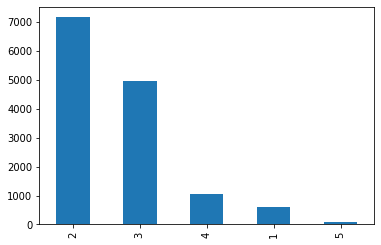

In [25]:
data['Numar_camere'].value_counts().plot.bar()

In [26]:
data.Suprafata.describe()

count     13900
unique      203
top          50
freq        991
Name: Suprafata, dtype: object

In [27]:
#Cea mai frecventa suprafata este de 50 m patrati, prezenta in 991 de anunturi. 

In [28]:
#Dat fiind faptul ca exista multe valori unice, am reprezentat mai jos primele 10 cele mai frecvent intalnite suprafete.

<AxesSubplot:>

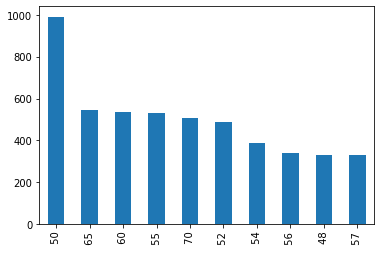

In [29]:
data['Suprafata'].value_counts()[:10].plot.bar()

In [30]:
data.Etaj.describe()

count     13900
unique        9
top           4
freq       2913
Name: Etaj, dtype: object

In [31]:
#Apartamentele cuprinse in studiu se afla la etajele 1-9. Etajul 4 este cel mai intalnit, in 2915 anunturi.

<AxesSubplot:>

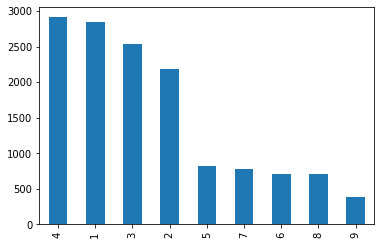

In [32]:
data['Etaj'].value_counts().plot.bar()

In [33]:
data.An_finalizare_constructie.describe()

count      13900
unique        52
top        1980 
freq        2222
Name: An_finalizare_constructie, dtype: object

In [34]:
#Cele mai multe apartamente puse in vanzare au fost date in folosinta in anul 1980, intalnindu-se in 2222 de anunturi. Clasamentul fiind completat de apartamentele date in folosinta in anii 2021, respectiv 2020.

In [35]:
#Pentru ca exista multe valori unice, am reprezentat primii 10 cei mai frecvent intalniti ani.

<AxesSubplot:>

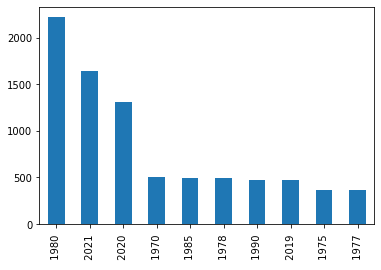

In [36]:
data['An_finalizare_constructie'].value_counts()[:10].plot.bar()